In [2]:
# Import packages
from numpy import *
from pandas import *
from matplotlib.pyplot import *
from seaborn import *
from xlrd import *
from datetime import *

In [3]:
# Reading datasets
cabData = read_csv("Cab_Data.csv")
city = read_csv("City.csv")
customerID = read_csv("Customer_ID.csv")
transactionID = read_csv("Transaction_ID.csv")
holiday = read_csv("Holiday.csv")

In [4]:
# Dataframe specifying all holiday dates
# Convert date entries to pandas datetime
holiday["Date"] = to_datetime(holiday["Date"])
holiday.head(5)

,Date,Holiday,WeekDay,Month,Day,Year
0,2004-07-04,4th of July,Sunday,7,4,2004
1,2005-07-04,4th of July,Monday,7,4,2005
2,2006-07-04,4th of July,Tuesday,7,4,2006
3,2007-07-04,4th of July,Wednesday,7,4,2007
4,2008-07-04,4th of July,Friday,7,4,2008


In [5]:
cabData.head(5)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [6]:
city.head(5)

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [7]:
customerID.head(5)

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [8]:
transactionID.head(5)

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [9]:
# Number of observations and features
print("Cab Data:", cabData.shape)
print("City:", city.shape)
print("Customer ID:", customerID.shape)
print("Transaction ID:", transactionID.shape)

Cab Data: (359392, 7)
City: (20, 3)
Customer ID: (49171, 4)
Transaction ID: (440098, 3)


---

## Data processing

- Checking abnormal values


In [10]:
# Checking null, N/A, and duplicated values
print(cabData.isnull().sum().sum())
print(cabData.isna().sum().sum())
cabDataDuplicated = cabData[cabData.duplicated()]
print(cabDataDuplicated.shape)

print(city.isnull().sum().sum())
print(city.isna().sum().sum())
cityDuplicated = city[city.duplicated()]
print(cityDuplicated.shape)

print(customerID.isnull().sum().sum())
print(customerID.isna().sum().sum())
customerIDDuplicated = customerID[customerID.duplicated()]
print(customerIDDuplicated.shape)

print(transactionID.isnull().sum().sum())
print(transactionID.isna().sum().sum())
transactionIDDuplicated = transactionID[transactionID.duplicated()]
print(transactionIDDuplicated.shape)
print("No null, N/A, or duplicate values are found.")

0
0
(0, 7)
0
0
(0, 3)
0
0
(0, 4)
0
0
(0, 3)
No null, N/A, or duplicate values are found.


- Add another column specifying profit made from each trip

In [11]:
cabData["Profit"] = cabData["Price Charged"] - cabData["Cost of Trip"]

- Outlier detection and removal

In [12]:
yellowCabData = cabData[cabData["Company"] == "Yellow Cab"]
pinkCabData = cabData[cabData["Company"] == "Pink Cab"]
yellowCabData = yellowCabData[abs(yellowCabData.Profit - yellowCabData.Profit.mean()) <= (1.5 * yellowCabData.Profit.std())]
pinkCabData = pinkCabData[abs(pinkCabData.Profit - pinkCabData.Profit.mean()) <= (1.5 * pinkCabData.Profit.std())]
cabData = concat([yellowCabData, pinkCabData], ignore_index=True)

- Merge dataframes

We can see from the feature names that the four datasets can be joined together to one. Namely, cab_data shares ```city``` with city and ```transaction ID``` with transaction_ID; and transaction_ID shares ```customer ID``` with dataset customer_ID. Therefore, we propose data processing below to merge into one dataset.

In [13]:
allTransactions = merge(cabData, transactionID)
allTransactions = merge(allTransactions, customerID)
allTransactions = merge(allTransactions, city)

In [14]:
print(allTransactions.shape)
print(allTransactions.dtypes)
allTransactions.head(5)

(326061, 15)
Transaction ID          int64
Date of Travel          int64
Company                object
City                   object
KM Travelled          float64
Price Charged         float64
Cost of Trip          float64
Profit                float64
Customer ID             int64
Payment_Mode           object
Gender                 object
Age                     int64
Income (USD/Month)      int64
Population             object
Users                  object
dtype: object


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000386,42372,Yellow Cab,ATLANTA GA,10.60,364.62,132.2880,232.3320,27884,Cash,Male,32,13505,"814,885","24,701"
1,10011294,42426,Yellow Cab,ATLANTA GA,18.43,434.92,245.4876,189.4324,27884,Card,Male,32,13505,"814,885","24,701"
2,10062284,42594,Yellow Cab,ATLANTA GA,40.80,629.34,533.6640,95.6760,27884,Card,Male,32,13505,"814,885","24,701"
3,10099530,42673,Yellow Cab,ATLANTA GA,22.22,404.35,274.6392,129.7108,27884,Cash,Male,32,13505,"814,885","24,701"
4,10007260,42412,Pink Cab,ATLANTA GA,27.44,380.45,293.6080,86.8420,27884,Cash,Male,32,13505,"814,885","24,701"


- Add another column specifying profit made from each trip

In [15]:
allTransactions["Profit"] = allTransactions["Price Charged"] - allTransactions["Cost of Trip"]

- Converting 5-digit date entries to pandas datetime format

In [16]:
allTransactions["Date of Travel"] = allTransactions["Date of Travel"].apply(lambda x: xldate.xldate_as_datetime(x, 0))

In [17]:
allTransactions.head(5)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000386,2016-01-03,Yellow Cab,ATLANTA GA,10.60,364.62,132.2880,232.3320,27884,Cash,Male,32,13505,"814,885","24,701"
1,10011294,2016-02-26,Yellow Cab,ATLANTA GA,18.43,434.92,245.4876,189.4324,27884,Card,Male,32,13505,"814,885","24,701"
2,10062284,2016-08-12,Yellow Cab,ATLANTA GA,40.80,629.34,533.6640,95.6760,27884,Card,Male,32,13505,"814,885","24,701"
3,10099530,2016-10-30,Yellow Cab,ATLANTA GA,22.22,404.35,274.6392,129.7108,27884,Cash,Male,32,13505,"814,885","24,701"
4,10007260,2016-02-12,Pink Cab,ATLANTA GA,27.44,380.45,293.6080,86.8420,27884,Cash,Male,32,13505,"814,885","24,701"


- Checking whether the given date is a weekend or holiday

In [18]:
# Convert datetime to day of week, 0 - Monday, 6 - Sunday
allTransactions["Day of Week"] = allTransactions["Date of Travel"].apply(lambda x: x.weekday())
allTransactions["Weekend or Holiday"] = where(allTransactions["Date of Travel"].isin(holiday.Date) | allTransactions["Day of Week"].isin([5,6]), 1, 0)

A glance of the final version of the dataset:

In [19]:
allTransactions.head(5)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Day of Week,Weekend or Holiday
0,10000386,2016-01-03,Yellow Cab,ATLANTA GA,10.60,364.62,132.2880,232.3320,27884,Cash,Male,32,13505,"814,885","24,701",6,1
1,10011294,2016-02-26,Yellow Cab,ATLANTA GA,18.43,434.92,245.4876,189.4324,27884,Card,Male,32,13505,"814,885","24,701",4,0
2,10062284,2016-08-12,Yellow Cab,ATLANTA GA,40.80,629.34,533.6640,95.6760,27884,Card,Male,32,13505,"814,885","24,701",4,0
3,10099530,2016-10-30,Yellow Cab,ATLANTA GA,22.22,404.35,274.6392,129.7108,27884,Cash,Male,32,13505,"814,885","24,701",6,1
4,10007260,2016-02-12,Pink Cab,ATLANTA GA,27.44,380.45,293.6080,86.8420,27884,Cash,Male,32,13505,"814,885","24,701",4,0


---

## Data Visualizations

- #### Research question 1: Which company is more profitable?

Text(0.5, 1.0, 'Profit Distributions')

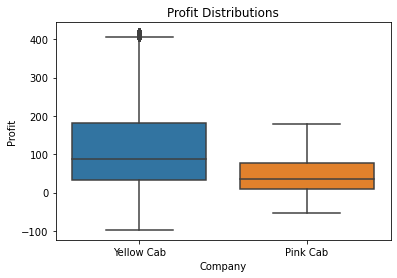

In [20]:
boxplot(data = allTransactions, x = "Company", y = "Profit")
title("Profit Distributions")

From the plot we can see Yellow Cab is more profitable than Pink Cab overall. Also, Yellow Cab have more trips that yield a large amount of money. But what about profit per kilometer?

In [21]:
allTransactions["Profit per km"] = allTransactions["Profit"] / allTransactions["KM Travelled"]

Text(0.5, 1.0, 'Unit km Profit Distributions')

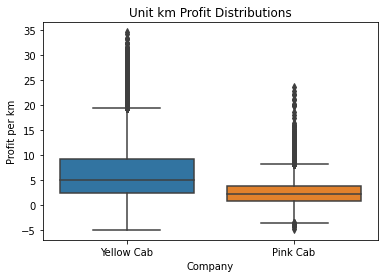

In [22]:
boxplot(data = allTransactions, x = "Company", y = "Profit per km")
title("Unit km Profit Distributions")

Again, Yellow Cab still has higher unit profit than Pink Cab.

- #### Research question 2: What are the customer distributions for the two companies? Are there any specific patterns?

    ##### 2.1. *Different population groups*

In [23]:
genderCounts = allTransactions.groupby("Company")["Gender"].value_counts()
print("The men to women user ratio for the two companies are:", genderCounts[0] / genderCounts[1], "for Pink Cab, and", genderCounts[2] / genderCounts[3], "for Yellow Cab.")

The men to women user ratio for the two companies are: 1.2555711939948393 for Pink Cab, and 1.3524351783657205 for Yellow Cab.


The gender distributions for the two companies are similar, with Yellow Cab slightly more favored by men users.

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age Distributions')

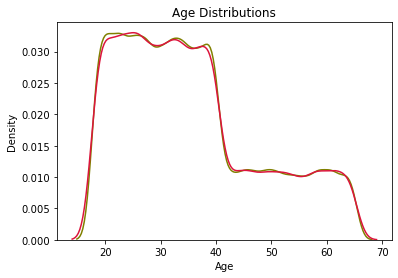

In [24]:
yellow = allTransactions[allTransactions["Company"] == "Yellow Cab"]
pink = allTransactions[allTransactions["Company"] == "Pink Cab"]
distplot(yellow["Age"], hist=False, color = "olive")
distplot(pink["Age"], hist=False, color = "crimson")
title("Age Distributions")

The age distribution for the two companies are very similar. One interesting aspect to notice is that the customers are generally within 20-40 years old, and there is a huge drop at the age of 40.

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Income Distributions')

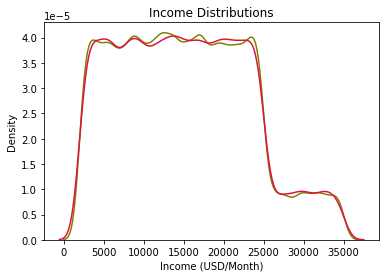

In [25]:
distplot(yellow["Income (USD/Month)"], hist=False, color = "olive")
distplot(pink["Income (USD/Month)"], hist=False, color = "crimson")
title("Income Distributions")

Again, the distributions of customer income are very similar for both companies, with most customers in the range of 5k - 25k per month.


  ##### 2.2 *Group by city*

Text(0.5, 1.0, 'Number of Transactions by City')

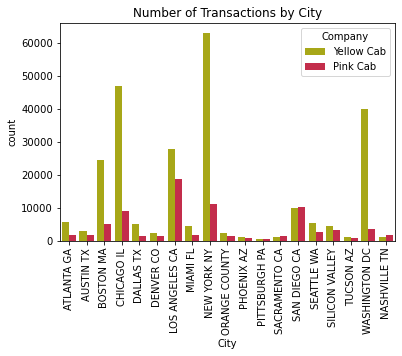

In [26]:
#profitByCity.columns = ["City", "Yellow", "Pink"]
#countplot(data = yellow, x = "City", color = "y")
#countplot(data = pink, x = "City", color = 'crimson')
countplot(data = allTransactions, x = "City", hue = "Company", palette = ["y", "crimson"])
xticks(rotation = 90)
title("Number of Transactions by City")

The figure above shows the number of transactions made by the two companies grouped by cities. As we can see Yellow Cab has a significantly larger amount of transactions in the biggest cities like New York and Chicago. As for smaller cities (well they're still very large ones, here I mean compared to NYC or LA), the two companies seem to have similar market share.

In [27]:
profitByCity = allTransactions.groupby(["City", "Company"], as_index = False)["Profit"].sum()
profitByCityYellow = profitByCity[profitByCity["Company"] == "Yellow Cab"]
profitByCityPink = profitByCity[profitByCity["Company"] == "Pink Cab"]

Text(0.5, 1.0, 'Total Profit by City')

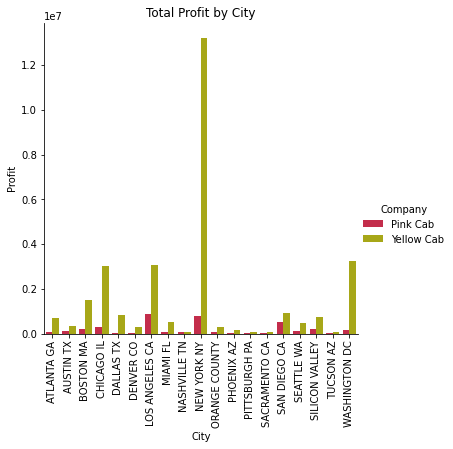

In [28]:
#catplot(data = profitByCityYellow, x = "City", color = "y")
catplot(data = profitByCity, x = "City", y = "Profit", hue = "Company", kind = "bar", palette = ["crimson", "y"])
xticks(rotation = 90)
title("Total Profit by City")

However, if we turn to total **profit** instead of **number of transactions**, this time Yellow Cab outweighs Pink Cab in all circumstances.

---

Yellow Cab and Pink Cab has similar **customer distributions**, but Yellow Cab makes more money no matter **in total** or **per kilometer**. And this trend is uniform across the country. Therefore, we should invest in **Yellow Cab**.

-----

(Research down this line carried out for **Yellow Cab** only as we have confirmed it to invest.)

- #### Research question 3: Is there an increase in profit on weekends and holidays? If yes, how much?

In [31]:
yellow.groupby("Weekend or Holiday").agg("mean")[["Profit", "Profit per km"]]

,Profit,Profit per km
Weekend or Holiday,,
0,114.044540,5.855161
1,124.431919,6.544999


As shown in the table above, Yellow Cab has a boost of total profit by **9.1%** and unit profit by **11.8%** for weekend and holidays than weekdays.

---

- #### Research Question 4: What are some good cities to invest?
    ##### 4.1 Of what percentage of the population are cab users?

Text(0.5, 1.0, 'Pencentage of Users by City')

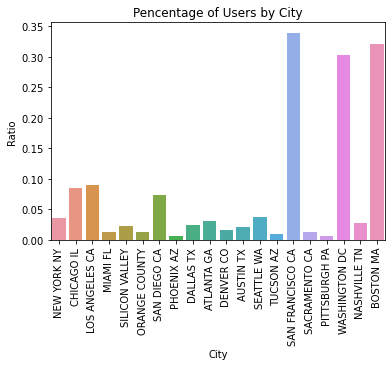

In [60]:
city["Ratio"] = city["Users"].str.replace(',', '').astype(float) / city["Population"].str.replace(',', '').astype(float)
barplot(data = city, x = "City", y = "Ratio")
xticks(rotation = 90)
title("Pencentage of Users by City")

Top three cities, namely San Francisco, Boston, and DC, have about 30% of the total population as cab users. These cities would be the best for advertising.

    
  ##### 4.2 Profit per trip by city

In [ ]:
# Convert string value of population data into float
yellow["Population"] = yellow["Population"].str.replace(',', '').astype(float)

Text(0.5, 1.0, 'Average Profit on a Single Trip by City')

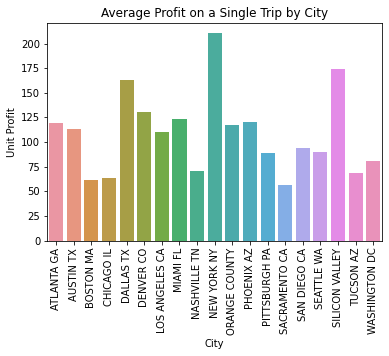

In [79]:
city = yellow[["City", "Profit", "Population"]].groupby("City").agg({"Profit":["sum", "count"]})
city["Unit Profit"] = city.iloc[:,0] / city.iloc[:,1]
barplot(data = city, x = city.index, y = "Unit Profit")
xticks(rotation = 90)
title("Average Profit on a Single Trip by City")
#pie(city)
#yellow["Profit per Capita"] = yellow["Profit"] / yellow["Population"].str.replace(',', '').astype(float)

##### 4.3 Profit per kilometer by city

,Profit,KM Travelled,Profit per KM
,sum,sum,
City,,,
ATLANTA GA,6.736865e+05,123343.82,5.461859
AUSTIN TX,3.314269e+05,64816.71,5.113293
BOSTON MA,1.504507e+06,550468.45,2.733139
CHICAGO IL,3.007395e+06,1063875.82,2.826829
DALLAS TX,8.353283e+05,108710.85,7.683946
DENVER CO,3.049427e+05,50808.43,6.001813
LOS ANGELES CA,3.057067e+06,621456.91,4.919194
MIAMI FL,5.317716e+05,95983.43,5.540244


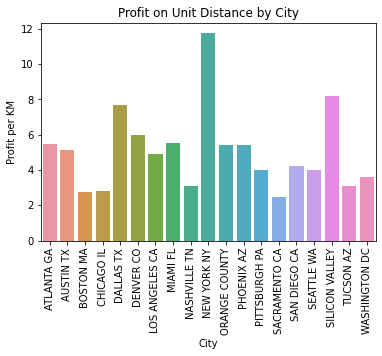

In [89]:
cityPerKM = yellow[["City", "Profit", "KM Travelled"]].groupby("City").agg({"Profit":["sum"], "KM Travelled": "sum"})
cityPerKM["Profit per KM"] = cityPerKM.iloc[:,0] / cityPerKM.iloc[:,1]
barplot(data = cityPerKM, x = cityPerKM.index, y = "Profit per KM")
xticks(rotation = 90)
title("Profit on Unit Distance by City")
cityPerKM

The two plots above show similar results. New York City, Silicon Valley, and Dallas are the three cities with the most unit profit (per trip and per kilometer).

Therefore, it's better to invest in **larger cities** as these provide more profit both on a single trip and annually (total profit plot is shown in section 2.2). Also, there're more white collars in larger cities, so it's not likely that our investment would fail. However, data related to **cost of advertisement** and **competitions** (these are usually harsher in larger cities) are not provided. Thus, this result still needs more advanced research.

---

- #### Research question 5: What is the ideal range of income for our customers? (ie. At which income level do we have maximum profit?)

In [102]:
income = yellow[["Income (USD/Month)", "Profit"]]
income["Income (USD/Month)"].describe()

count    249137.000000
mean      15027.357643
std        7968.327373
min        2000.000000
25%        8408.000000
50%       14646.000000
75%       21016.000000
max       34996.000000
Name: Income (USD/Month), dtype: float64

In [116]:
# Helper function to sort income level
def sortIncome(income):
    if income < 4000:
        return "2000 - 4000"
    elif income < 6000:
        return "4000 - 6000"
    elif income < 8000:
        return "6000 - 8000"
    elif income < 10000:
        return "8000 - 10000"
    elif income < 15000:
        return "10000 - 15000"
    elif income < 20000:
        return "15000 - 20000"
    else:
        return "> 20000"

income["Income Range"] = income["Income (USD/Month)"].apply(sortIncome)
income.groupby("Income Range").agg({"Profit":"mean"})

<ipython-input-116-5f8ca58c21b7>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income["Income Range"] = income["Income (USD/Month)"].apply(sortIncome)


,Profit
Income Range,
10000 - 15000,118.249999
15000 - 20000,120.435792
2000 - 4000,118.053996
4000 - 6000,118.585726
6000 - 8000,116.428756
8000 - 10000,116.357120
> 20000,118.589999


As shown from the table, the profit from a single trip is very similar among all income groups, all around 118USD.



---

## Conclusion

In this study, **EDA** was used to identify a better cab company to invest among Yellow Cab and Pink Cab. Several factors were taken into account, such as **profit distribution**, **customer attributes**, and characteristics **grouped by city**. The two companies has similar customer composition, but Yellow Cab outweighs Pink Cab in total profit, per kilometer profit, and almost in all cities. Therefore, we suggest to invest in **Yellow Cab**. And finally, investing in the few **largest cities** gives the most payback according to our plots.